In [1]:
import pandas as pd

# Load Good units
df_loaded = pd.read_pickle(r"Q:\sachuriga\CR_CA1_paper\tables/functional_properties_with_python_measurements_pycirc.pkl")
df_loaded 

level_0   index                                        spike_times  \
0         0.0     0.0  [79.80586666666666, 82.36903333333333, 82.5270...   
1         1.0     1.0  [355.5495666666667, 494.1717, 555.7439, 658.68...   
2         2.0    14.0  [82.09543333333333, 136.72986666666668, 136.74...   
3         3.0    15.0  [64.0384, 64.07413333333334, 64.1816, 64.1974,...   
4         0.0     2.0  [85.13216666666666, 85.2458, 85.54376666666667...   
...       ...     ...                                                ...   
1631      0.0  1621.0  [49.524566666666665, 50.489733333333334, 50.57...   
1632      1.0  1622.0  [56.047333333333334, 65.78253333333333, 70.588...   
1633      2.0  1623.0  [51.956, 55.55363333333333, 58.28136666666666,...   
1634      0.0  1635.0  [49.797266666666665, 49.8036, 49.8072666666666...   
1635      1.0  1636.0  [57.445566666666664, 61.043933333333335, 105.3...   

     unit_name  sd_ratio  sync_spike_8.1  presence_ratio  cluster_id.30  \
0            5  1.911421             0.0        1.000000            0.0   
1            6  2.804665             0.0        0.473684            1.0   
2           54  1.646448             0.0        0.894737           14.0   
3            3  1.228305             0.0        1.000000           17.0   
4           14  2.514760             0.0        1.000000            2.0   
...        ...       ...             ...             ...            ...   
1631        31  1.324470             0.0        1.000000           20.0   
1632        32  1.255092             0.0        1.000000           21.0   
1633        34  1.375887             0.0        1.000000           23.0   
1634        64  1.134203             0.0        1.000000           40.0   
1635        65  2.047484             0.0        0.853659           41.0   

      half_width     l_ratio.1  ...  tau_rise_python  acg_first_positive_x  \
0       0.000113  5.665784e-03  ...         4.451148                  1.65   
1       0.000097  8.633910e-10  ...         0.104703                  2.05   
2       0.000127  9.464268e-03  ...         0.586338                  2.25   
3       0.000113  1.259474e-02  ...         3.804981                  2.40   
4       0.000143  2.147104e-05  ...         0.620418                  2.45   
...          ...           ...  ...              ...                   ...   
1631    0.000120  0.000000e+00  ...         0.743241                  2.90   
1632    0.000100  4.147505e-12  ...         3.548131                  2.90   
1633    0.000133  0.000000e+00  ...         2.572809                  2.30   
1634    0.000080  6.495784e-13  ...         0.503629                  2.95   
1635    0.000133  1.070938e-11  ...         0.717245                  2.95   

            buzaki_py_cell_type  location_cell_type  stability_ma  \
0                     pyramidal         superficial      0.456784   
1                     pyramidal         superficial      0.345554   
2                     pyramidal         superficial      0.890294   
3     narrow_spike_interneurons         superficial      0.663995   
4                     pyramidal         superficial      0.718201   
...                         ...                 ...           ...   
1631                  pyramidal                deep      0.585391   
1632                  pyramidal         superficial      0.745264   
1633                  pyramidal         superficial        0.0146   
1634                  pyramidal                deep      0.300765   
1635                  pyramidal                deep      0.987797   

                                            spike_phase        r1        r2  \
0     [5.218413652202454, 5.660396879893522, 6.00887...  0.302898  0.294170   
1     [0.2442046884066931, 3.8945436708774297, 4.534...  0.601665  0.601665   
2     [0.8644686399726236, 1.6544690800607977, 2.649...  0.225373  0.278115   
3     [0.05014304322130533, 1.5487023955362624, 0.23...  0.526430  0.533573   
4     [5.905632612506011, 6.196

In [2]:
def get_base_name(col):
    # 去掉 _x, _y, _z 等后缀
    return col.rsplit('_', 1)[0] if '_' in col and col.endswith(('_x', '_y', '_z')) else col

# 获取列名分组
base_names = {}
for col in df_loaded.columns:
    base = get_base_name(col)
    if base not in base_names:
        base_names[base] = []
    base_names[base].append(col)

# 2. 只保留每个基名的第一个列，并重命名去掉后缀
keep_columns = []
for base, cols in base_names.items():
    if len(cols) > 1:
        # 如果有重复列，保留第一个，去掉后缀
        keep_columns.append((cols[0], base))
    else:
        # 没有后缀的列直接保留
        keep_columns.append((cols[0], cols[0]))

# 3. 选择保留的列并重命名
selected_columns = [col for col, _ in keep_columns]
df_cleaned = df_loaded[selected_columns].copy()
df_cleaned.columns = [new_name for _, new_name in keep_columns]

# 4. 可选：重置索引
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.to_pickle(r"Q:\sachuriga\CR_CA1_paper\tables/functional_properties_with_python_measurements_pycirc.pkl")

In [5]:
from scipy import stats
control_ks_stat, control_ks_p = stats.shapiro(control_values)
control_ks_p

2.5302845906092417e-15


Comparison for PS_slope1 (Session A):
Control mean: -0.20 ± 0.01
Experimental mean: -0.20 ± 0.01
One-sided Mann-Whitney U statistic: 24129.00, p-value: 0.5065
 KS statistic: 0.04, p-value: 0.6255
KS statistic: 0.05, p-value: 0.9645
session A, n con 246, n exp 196

Comparison for PS_slope2 (Session A):
Control mean: -0.25 ± 0.01
Experimental mean: -0.21 ± 0.01
One-sided Mann-Whitney U statistic: 20932.00, p-value: 0.0415
 KS statistic: 0.00, p-value: 1.0000
KS statistic: 0.12, p-value: 0.0656
session A, n con 241, n exp 192

Comparison for theta_index (Session A):
Control mean: 8.97 ± 0.18
Experimental mean: 8.73 ± 0.17
One-sided Mann-Whitney U statistic: 25434.00, p-value: 0.6590


C:\Users\sachur\AppData\Local\Temp\ipykernel_25580\1242616744.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25580\1242616744.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25580\1242616744.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


 KS statistic: 0.09, p-value: 0.1357
KS statistic: 0.09, p-value: 0.2706
session A, n con 250, n exp 199

Comparison for PS_cr1 (Session A):
Control mean: 0.02 ± 0.02
Experimental mean: 0.04 ± 0.02
One-sided Mann-Whitney U statistic: 22744.50, p-value: 0.1535
 KS statistic: 0.03, p-value: 0.7705
KS statistic: 0.10, p-value: 0.1774
session A, n con 246, n exp 196

Comparison for PS_cr2 (Session A):
Control mean: -0.04 ± 0.02
Experimental mean: -0.02 ± 0.02
One-sided Mann-Whitney U statistic: 22152.50, p-value: 0.2237
 KS statistic: 0.04, p-value: 0.6541
KS statistic: 0.11, p-value: 0.1374
session A, n con 241, n exp 192

Comparison for PS_cr3 (Session A):
Control mean: -0.03 ± 0.01
Experimental mean: -0.03 ± 0.01


C:\Users\sachur\AppData\Local\Temp\ipykernel_25580\1242616744.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25580\1242616744.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25580\1242616744.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


One-sided Mann-Whitney U statistic: 23377.00, p-value: 0.5597
 KS statistic: 0.10, p-value: 0.0943
KS statistic: 0.12, p-value: 0.0760
session A, n con 239, n exp 194


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


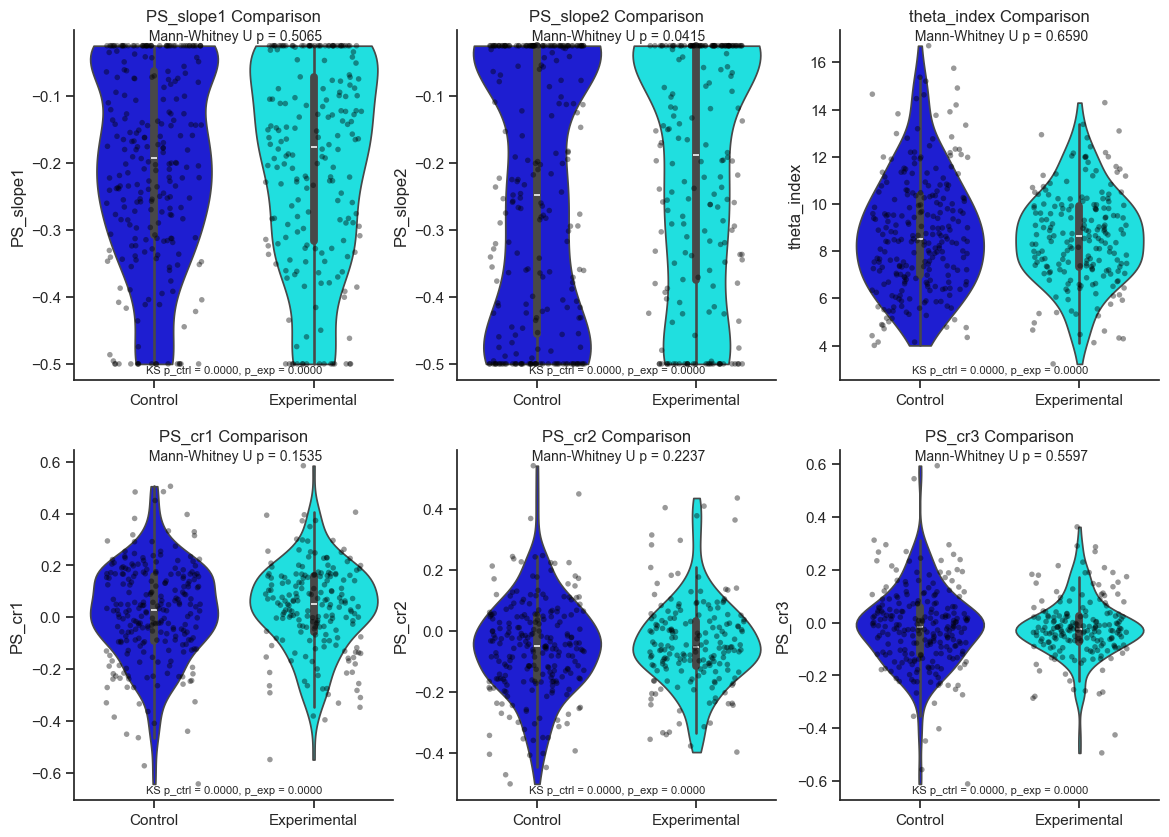

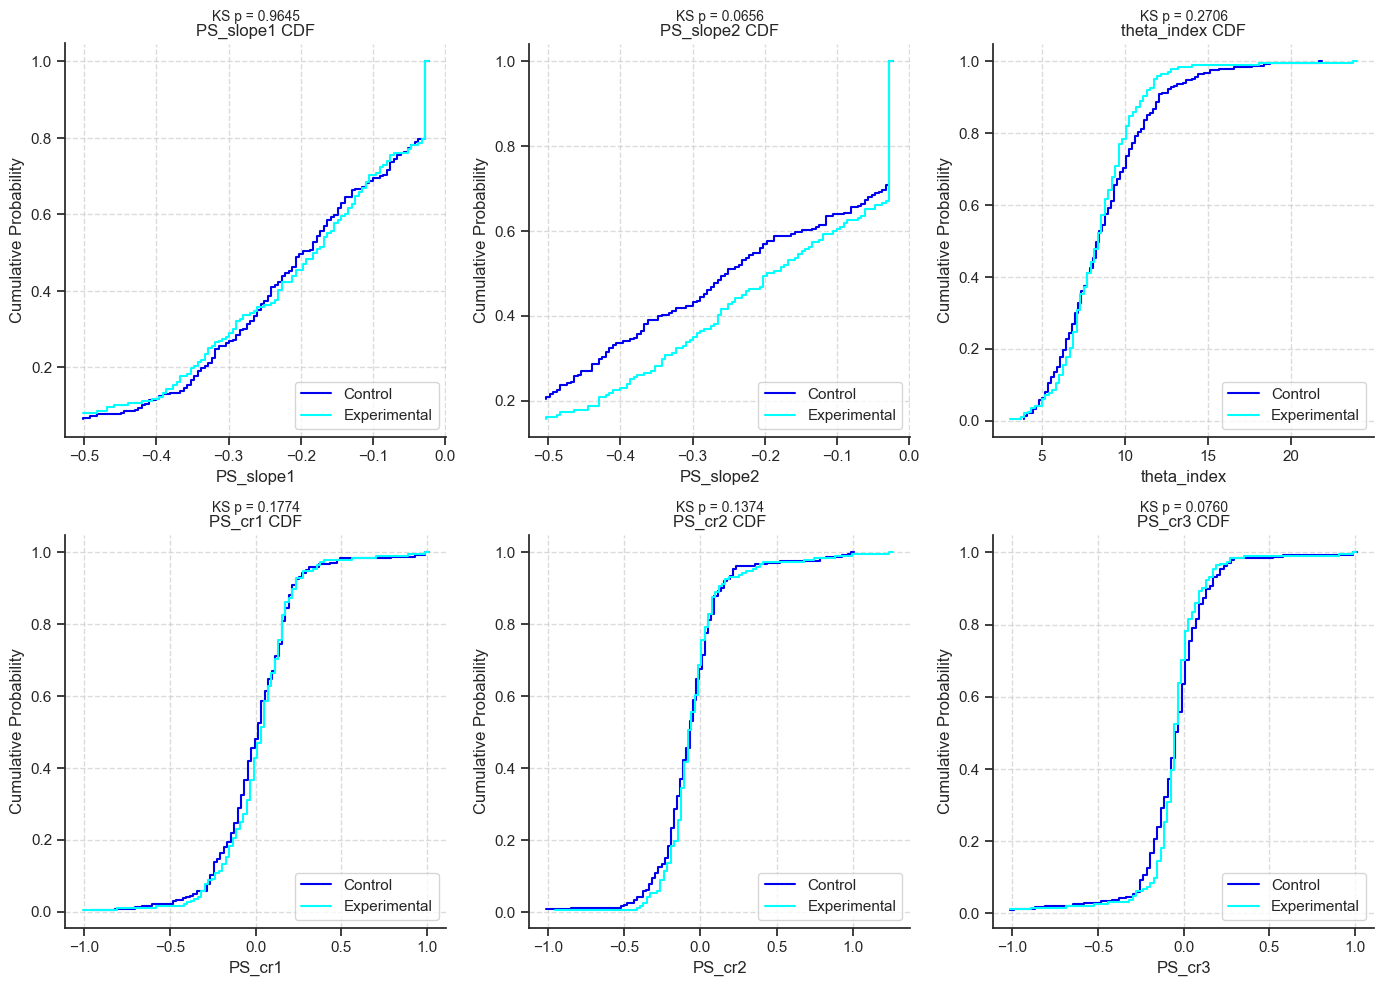

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load Good units
#df_loaded = pd.read_pickle(r"Q:\sachuriga\CR_CA1_paper/tables/functional_properties_with_python_measurements.pkl")
df_good = df_cleaned[df_cleaned['unit_quality'] == "good"]
df_py = df_good[(df_good['buzaki_py_cell_type'] == "pyramidal")]

#df_phase_precessing =  df_py[(df_py['PS_p1'] < 0.05) & (df_py['theta_index'] > 5)]  
df_phase_precessing =  df_py
funct = [""]

for functional_plot in funct:
    df = df_phase_precessing

    base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/cell_type"

    control_ids = ['65165', '65091', '63383', '66539', '65622']
    exp_ids = ['65588', '63385', '66538', '66537', '66922']

    session = ["A"]

    for session in session:
        if session == "Total":
            df_a = df
        else:
            df_a = df[df['session'] == session]

        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

        sns.set_theme(style="ticks")

        metrics = ['PS_slope1', 'PS_slope2', "theta_index",'PS_cr1','PS_cr2','PS_cr3']

        fig_violin, axes_violin = plt.subplots(2, 3, figsize=(14, 10))
        axes_violin = axes_violin.flatten()

        fig_cdf, axes_cdf = plt.subplots(2, 3, figsize=(14, 10))
        axes_cdf = axes_cdf.flatten()

        control_color = sns.color_palette(palette='flag')[-1]
        exp_color = "cyan"

        for idx, metric in enumerate(metrics):
            control_values = control_df[metric].dropna().reset_index(drop=True)
            exp_values = exp_df[metric].dropna().reset_index(drop=True)


            if len(control_values) > 0 and len(exp_values) > 0:
                control_mean = control_values.mean()
                exp_mean = exp_values.mean()
                control_sem = control_values.sem()
                exp_sem = exp_values.sem()

                print(f"\nComparison for {metric} (Session {session}):")
                print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
                print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")

                # Statistical tests for violin plot (one-sided, control > exp)
                control_ks_stat, control_ks_p = stats.shapiro(control_values)
                # control_ks_stat, control_ks_p = stats.kstest(control_values, 'norm', 
                #                                             args=(control_mean, control_values.std()))
                
                exp_ks_stat, exp_ks_p = stats.shapiro(exp_values)
                normal = control_ks_p > 0.05 and exp_ks_p > 0.05

                levene_stat, levene_p = stats.levene(control_values, exp_values)
                homoscedastic = levene_p > 0.05

                if normal and homoscedastic:
                    t_stat, p_val = stats.ttest_ind(control_values, exp_values, equal_var=True)
                    test_name = " t-test"
                    print(f"One-sided t-test statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
                else:
                    x = np.asarray(control_values.dropna(), dtype=float)
                    y = np.asarray(exp_values.dropna(), dtype=float)

                    u_stat, p_val = stats.mannwhitneyu(x, y, alternative='less')
                    test_name = " Mann-Whitney U"
                    print(f"One-sided Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.4f}")

                # Two-sample KS test (one-sided, control > exp)
                ks_stat, ks_p = stats.ks_2samp(control_values, exp_values, alternative='less')
                print(f" KS statistic: {ks_stat:.2f}, p-value: {ks_p:.4f}")

                # Two-sample KS test for CDF
                ks_stat, ks_p = stats.ks_2samp(control_values, exp_values)
                print(f"KS statistic: {ks_stat:.2f}, p-value: {ks_p:.4f}")

                n_con = len(control_values)
                n_exp = len(exp_values)
                print(fr"session {session}, n con {n_con}, n exp {n_exp}")
                # Violin Plot
                plot_df = pd.DataFrame({
                    'value': pd.concat([control_values, exp_values]),
                    'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
                })
                all_values = plot_df['value']
                mean_val = all_values.mean()
                std_val = all_values.std()
                plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                           (plot_df['value'] <= mean_val + 3 * std_val)]

                sns.violinplot(
                    data=plot_df_filtered, x='group', y='value', ax=axes_violin[idx],
                    palette={"Control": control_color, "Experimental": exp_color}, width=0.8, cut=0
                )
                for patch in axes_violin[idx].collections:
                    patch.set_alpha(1)

                sns.stripplot(
                    data=plot_df_filtered, x='group', y='value', ax=axes_violin[idx], size=4,
                    hue='group', palette={"Control": "black", "Experimental": "black"},
                    alpha=0.4, jitter=0.3, legend=False
                )

                axes_violin[idx].set_title(f'{metric} Comparison')
                axes_violin[idx].set_ylabel(metric)
                axes_violin[idx].set_xlabel('')
                axes_violin[idx].yaxis.grid(False)
                axes_violin[idx].text(0.5, 0.04, f'KS p_ctrl = {control_ks_p:.4f}, p_exp = {exp_ks_p:.4f}', 
                                     ha='center', va='top', transform=axes_violin[idx].transAxes, fontsize=8)
                axes_violin[idx].text(0.5, 1.002, f'{test_name} p = {p_val:.4f}', 
                                     ha='center', va='top', transform=axes_violin[idx].transAxes, fontsize=10)
                axes_violin[idx].spines['top'].set_visible(False)
                axes_violin[idx].spines['right'].set_visible(False)
                axes_violin[idx].spines['bottom'].set_visible(True)
                axes_violin[idx].spines['left'].set_visible(True)

                # CDF Plot
                control_cfreq = stats.cumfreq(control_values, numbins=100)
                exp_cfreq = stats.cumfreq(exp_values, numbins=100)

                control_cdf = control_cfreq.cumcount / control_cfreq.cumcount[-1]
                exp_cdf = exp_cfreq.cumcount / exp_cfreq.cumcount[-1]

                num_bins = len(control_cfreq.cumcount)
                control_x = control_cfreq.lowerlimit + np.linspace(0, control_cfreq.binsize * num_bins, num_bins)
                num_bins = len(exp_cfreq.cumcount)
                exp_x = exp_cfreq.lowerlimit + np.linspace(0, exp_cfreq.binsize * num_bins, num_bins)

                axes_cdf[idx].step(control_x, control_cdf, label='Control', color=control_color, linewidth=1.5)
                axes_cdf[idx].step(exp_x, exp_cdf, label='Experimental', color=exp_color, linewidth=1.5)


                axes_cdf[idx].set_title(f'{metric} CDF')
                axes_cdf[idx].set_xlabel(metric)
                axes_cdf[idx].set_ylabel('Cumulative Probability')
                axes_cdf[idx].legend(loc='lower right')
                axes_cdf[idx].grid(True, linestyle='--', alpha=0.7)
                axes_cdf[idx].text(0.5, 1.05, f'KS p = {ks_p:.4f}', 
                                  ha='center', va='bottom', transform=axes_cdf[idx].transAxes, fontsize=10)
                axes_cdf[idx].spines['top'].set_visible(False)
                axes_cdf[idx].spines['right'].set_visible(False)

        fig_violin.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}.eps', format='eps', bbox_inches='tight')
        fig_violin.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}.png', format='png', bbox_inches='tight')

        fig_cdf.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}_cdf.eps', format='eps', bbox_inches='tight')
        fig_cdf.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}_cdf.png', format='png', bbox_inches='tight')

        plt.tight_layout()
        plt.show()

In [4]:
import pandas as pd

# Load Good units
df_loaded = pd.read_pickle(r"Q:\sachuriga\CR_CA1_paper/tables/good_units_with_tsnLabels_withphase.pkl")

df_good = df_loaded[df_loaded['unit_quality'] == "good"]
df_py = df_good[(df_good['cell_type'] == "pyramidal")]

df_phase_precessing =  df_py[(df_py['PS_p1'] < 0.05) & (df_py['PS_cr1'] < 0) &(df_good['theta_index'] > 5)]  
funct = [""]

# Define control and experimental animal IDs
control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

# Sessions to analyze
sessions = ["A", "B", "C", "Total"]

# Calculate and print ratios for each session
for session in sessions:
    if session == "Total":
        df_py_session = df_py
        df_phase_session = df_phase_precessing
    else:
        df_py_session = df_py[df_py['session'] == session]
        df_phase_session = df_phase_precessing[df_phase_precessing['session'] == session]

    # Split into control and experimental groups
    control_py = df_py_session[df_py_session['animal_id'].isin(control_ids)]
    exp_py = df_py_session[df_py_session['animal_id'].isin(exp_ids)]
    control_phase = df_phase_session[df_phase_session['animal_id'].isin(control_ids)]
    exp_phase = df_phase_session[df_phase_session['animal_id'].isin(exp_ids)]

    # Calculate ratios
    control_ratio = len(control_phase) / len(control_py) if len(control_py) > 0 else 0
    exp_ratio = len(exp_phase) / len(exp_py) if len(exp_py) > 0 else 0

    # Print results
    print(f"\nSession: {session}")
    print(f"Control - Pyramidal cells: {len(control_py)}, Phase precessing cells: {len(control_phase)}, Ratio: {control_ratio:.4f}")
    print(f"Experimental - Pyramidal cells: {len(exp_py)}, Phase precessing cells: {len(exp_phase)}, Ratio: {exp_ratio:.4f}")


Session: A
Control - Pyramidal cells: 268, Phase precessing cells: 50, Ratio: 0.1866
Experimental - Pyramidal cells: 222, Phase precessing cells: 34, Ratio: 0.1532

Session: B
Control - Pyramidal cells: 153, Phase precessing cells: 28, Ratio: 0.1830
Experimental - Pyramidal cells: 205, Phase precessing cells: 41, Ratio: 0.2000

Session: C
Control - Pyramidal cells: 135, Phase precessing cells: 25, Ratio: 0.1852
Experimental - Pyramidal cells: 192, Phase precessing cells: 35, Ratio: 0.1823

Session: Total
Control - Pyramidal cells: 556, Phase precessing cells: 103, Ratio: 0.1853
Experimental - Pyramidal cells: 619, Phase precessing cells: 110, Ratio: 0.1777


C:\Users\sachur\AppData\Local\Temp\ipykernel_25580\1862681148.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phase_precessing =  df_py[(df_py['PS_p1'] < 0.05) & (df_py['PS_cr1'] < 0) &(df_good['theta_index'] > 5)]
